In [101]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [102]:
class Planeta:

    def __init__(self, e, a, t):

        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo

        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor

        self.G = 4*np.pi**2 # Unidades gaussianas

        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)

        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )

        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)

        # El valor del pasado
        self.rp = self.r

    def GetAceleration(self):

        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r


    def Evolution(self,i):

        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()

        if i==0:
            self.r = self.rp + self.v*self.dt
        else:

            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)

            self.rp = self.r
            self.r = self.rf

    def SetPosition(self,i):
        self.R[i] = self.r

    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetPosition(self,scale=1):
        return self.R[::scale]

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def GetPerihelio(self):

        Dist = np.linalg.norm(self.R,axis=1)

        timeup = []

        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])

        return timeup

In [103]:
def GetPlanetas(t):

    Mercurio = Planeta(0.2056,0.307,t)
    Venus =    Planeta(0.0067,0.7233,t)
    Tierra =   Planeta(0.01671,1.,t)

    Marte =    Planeta(0.0934,1.523679,t)
    Jupiter =  Planeta(0.048,5.203,t)

    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [104]:
print("4.a")
print("Mercurio tiene una excentricidad de 0.2056 y un semi eje mayor de 0.307 au")
print("Venus tiene una excentricidad de 0.0067 y un semi eje mayor de 0.7233 au")
print("La Tierra tiene una excentricidad de 0.01671 y un semi eje mayor de 1 au")

print("Marte tiene una excentricidad de 0.0934 y un semi eje mayor de 1.523679 au")
print("Jupiter tiene una excentricidad de 0.048 y un semi eje mayor de 5.203 au")

4.a
Mercurio tiene una excentricidad de 0.2056 y un semi eje mayor de 0.307 au
Venus tiene una excentricidad de 0.0067 y un semi eje mayor de 0.7233 au
La Tierra tiene una excentricidad de 0.01671 y un semi eje mayor de 1 au
Marte tiene una excentricidad de 0.0934 y un semi eje mayor de 1.523679 au
Jupiter tiene una excentricidad de 0.048 y un semi eje mayor de 5.203 au


In [105]:
dt = 0.001
tmax = 28
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [106]:
def RunSimulation(t,Planetas):

    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared


    return Planetas

In [107]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 28000/28000 [00:01<00:00, 17640.28 Steps/s]


In [108]:
print("4.b")
lista_mercurio = Planetas[0].GetPerihelio()
T_mercurio = (lista_mercurio[-1] - lista_mercurio[0])/(len(lista_mercurio)-1)
print("Mercurio tiene un periodo de",round(T_mercurio,3), "años terrestes")

lista_venus = Planetas[1].GetPerihelio()
T_venus = (lista_venus[-1] - lista_venus[0])/(len(lista_venus)-1)
print("Venus tiene un periodo de",round(T_venus,3), "años terrestes")

lista_tierra = Planetas[2].GetPerihelio()
T_tierra = (lista_tierra[-1] - lista_tierra[0])/(len(lista_tierra)-1)
print("La Tierra tiene un periodo de",round(T_tierra,3), "año terreste")

lista_marte = Planetas[3].GetPerihelio()
T_marte = (lista_marte[-1] - lista_marte[0])/(len(lista_marte)-1)
print("Marte tiene un periodo de",round(T_marte,3), "año terreste")

lista_jupiter = Planetas[4].GetPerihelio()
T_jupiter = (lista_jupiter[-1] - lista_jupiter[0])/(len(lista_jupiter)-1)
print("Jupiter tiene un periodo de",round(T_jupiter,3), "año terreste")

4.b
Mercurio tiene un periodo de 0.17 años terrestes
Venus tiene un periodo de 0.615 años terrestes
La Tierra tiene un periodo de 1.0 año terreste
Marte tiene un periodo de 1.881 año terreste
Jupiter tiene un periodo de 11.868 año terreste


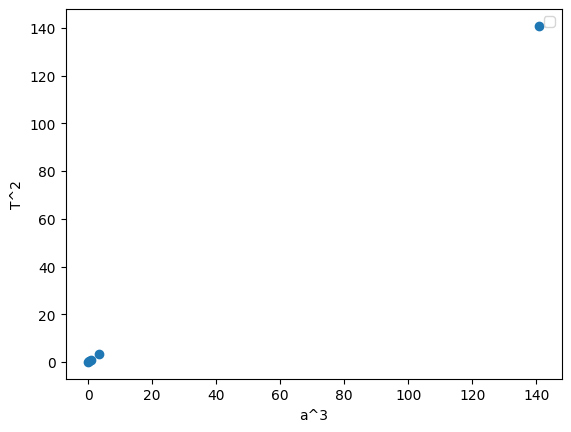

4.c


In [109]:
periodos = np.array([T_mercurio,T_venus,T_tierra,T_marte,T_jupiter])
T_cuadrado = periodos**2
a = np.array([0.307,0.7233,1,1.523679,5.203])
a_cubo = a**3

plt.plot(a_cubo,T_cuadrado,'o')
plt.xlabel('a^3')
plt.ylabel('T^2')
plt.legend()
plt.show()

print("4.c")



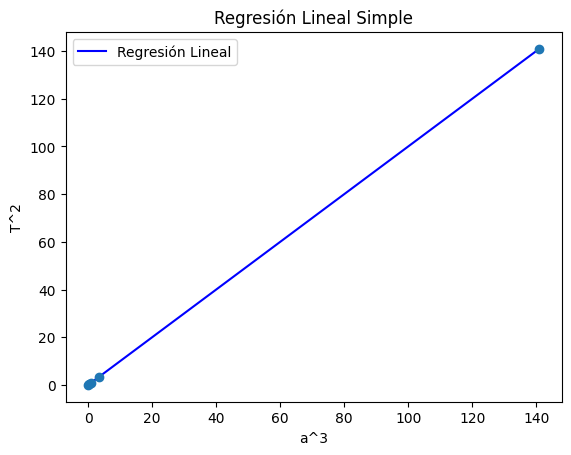

4. d
La pendiente obtenida es de 1.0 year^2/au^3
El punto de corte es de  0.0001  year^2


In [110]:
# Calcular la pendiente (m) y la ordenada al origen (b) para la regresión lineal
m, b = np.polyfit(a_cubo, T_cuadrado, 1)

# Crear la línea de regresión lineal usando los parámetros m y b
regression_line = m * a_cubo + b

# Graficar los datos de ejemplo y la línea de regresión
##plt.scatter(x, y, label='Datos de ejemplo')
plt.plot(a_cubo, regression_line, color='blue', label='Regresión Lineal')
plt.title('Regresión Lineal Simple')
plt.xlabel('a^3')
plt.ylabel('T^2')
plt.legend()


plt.plot(a_cubo,T_cuadrado,'o')
plt.show()
# Mostrar la gráfica
print("4. d")
plt.show()

print("La pendiente obtenida es de",round(m,4),"year^2/au^3")
print("El punto de corte es de ",round(b,4)," year^2")